In [1]:
import numpy as np
import scanpy as sc
import torch

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('/data/nelkazwi/code/cisTopic/')
from cisTopic import cisTopic


In [5]:
path = '/data/nelkazwi/code/CRAK-Velo/notebooks/data/10X_mouse_brain_dataset/'

adata_atac = sc.read(path+"adata_atac_fit.h5ad")


In [6]:
adata_atac

AnnData object with n_obs × n_vars = 3365 × 4002
    obs: 'n_counts', 'celltype'
    var: 'chrom', 'chromStart', 'chromEnd'
    obsm: 'cisTopic'

In [7]:
n_samples = 3000
n_burnin = 10
T = 30
n_b_samples = int(n_samples/n_burnin)
batch_size = 500
alpha = 50/T
beta = 0.1


cis_t = cisTopic(adata_atac, T, alpha, beta)

In [8]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'
print(f'Running on: {device}')

theta, phi = cis_t.fit(batch_size, n_samples, n_burnin, dev=device, save_data=False)

Running on: cuda


Processing: 100%|██████████| 3000/3000 [06:21<00:00,  7.87it/s]


In [9]:
m=theta[50:,:,:].mean(axis=0)
m=m/m.sum(axis=1)[:,np.newaxis] 


m_phi = phi[50:,:,:].mean(axis=0)
m_phi =m_phi /m_phi.sum(axis=1)[:,np.newaxis]

In [11]:
adata_atac.obsm["cisTopic"]=m.numpy()
sc.pp.neighbors(adata_atac, use_rep="cisTopic")
sc.tl.umap(adata_atac)

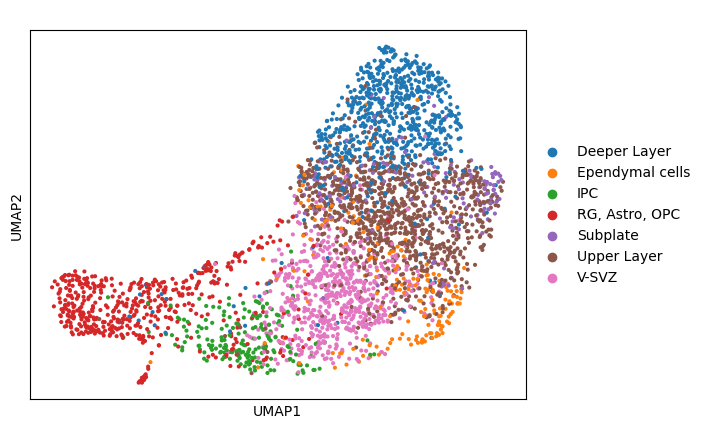

In [13]:
sc.pl.umap(adata_atac,color="celltype",title=" ",
            legend_fontweight='bold')